# YOUR PROJECT TITLE

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **data analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `dataproject.py` file includes a function which can be used multiple times in this notebook.

In the recent years, danish policymakers have expressed concern for the state of the national fertility rates. According to the danish newspaper Berlingske, a danish woman would in 2022 on average give birth to 1,55 children (see [this website](https://www.berlingske.dk/samfund/foedselsraten-falder-i-naesten-alle-landsdele-koebenhavn-er-blandt-de)). 
To sustain the population size without taking immigration into consideration, a woman would need to give birth to 2,1 children. However cynical it may sound, it is of great economical interest why the fertility rates are declining, because policy makers are already introducing measures to deal with the decline. In her new years speech, the prime mininister adressed to the nation that extra rounds of fertility treatment would become accessible for free for danish women in the forthcoming year. In this projject, we investigate the determining factors for the danish fertility.


Imports and set magics:

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
import mpl_axes_aligner
#from matplotlib_venn import venn2

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
import dataproject


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [43]:
#pip install mpl-axes-aligner

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for mpl-axes-aligner: filename=mpl_axes_aligner-1.3-py3-none-any.whl size=4774 sha256=50a3e96c8c87637ac3c0508a2042f63318a731b6f3a07a15464fc78c2db9ffb4
  Stored in directory: c:\users\lenovo\appdata\local\pip\cache\wheels\fb\c5\83\3e57a13e29e717ea464107db3f256122f336836008bd8e5719
Successfully built mpl-axes-aligner
Note: you may need to restart the kernel to use updated packages.


In [2]:
#pip install git+https://github.com/alemartinello/dstapi

In [3]:
import pandas as pd
from IPython.display import display
import requests
from dstapi import DstApi


In [4]:
from dataproject import*
BNP = data_NAN1()
BNP.head()

,TRANSAKT,PRISENHED,TID,INDHOLD
0,B.1*g Gross domestic product,Period-to-period real growth (per cent),1979,3.9
1,B.1*g Gross domestic product,Period-to-period real growth (per cent),2022,2.7
2,B.1*g Gross domestic product,Period-to-period real growth (per cent),2005,2.3
3,B.1*g Gross domestic product,Period-to-period real growth (per cent),1985,4.0
4,B.1*g Gross domestic product,Period-to-period real growth (per cent),1991,1.4


In [5]:
# Clean and rename dataset on GDP

# a. drop the descriptive columns "TRANSAKT" and "PRISENHED"
drop_these = ['TRANSAKT','PRISENHED']
BNP.drop(drop_these, axis=1, inplace=True)

# b. rename columns to more suitable variable names
BNP.rename(columns = {'INDHOLD':'g'}, inplace=True)

# c. drop missing entries
I = BNP.loc[BNP.g == '..'] 
BNP.drop(I.index, inplace=True)

# d. sort dataset by year
BNP.sort_values(by = ['TID'], inplace=True)

# e. convert all entries to float
BNP['g'] = BNP['g'].astype('float')
BNP.head()


,TID,g
48,1967,5.5
55,1968,5.6
17,1969,6.5
26,1970,1.6
53,1971,3.0


In [6]:
HIS = data_HISB3()
HIS.head()

,BEVÆGELSE,TID,INDHOLD
0,"Women January 1. (in 1,000)",2000,2696
1,Total number of livebirths,2000,67084
2,"Women January 1. (in 1,000)",2001,2705
3,Total number of livebirths,2001,65458
4,"Women January 1. (in 1,000)",2002,2714


In [7]:
# clean and rename dataset on births and amount of women

# a. sort dataset on year and variable
HIS.sort_values(by = ['TID','BEVÆGELSE'], inplace=True)

# b. create subsets of odd and even rows to separate births and amount of women
even = HIS.iloc[::2]
odd = HIS.iloc[1::2]

# c. rename the column "INDHOLD" to births
even.rename(columns={'INDHOLD':'births'}, inplace=True)
print(even)

# d. rename the column "INDHOLD" to women
odd.rename(columns = {'INDHOLD': 'women'}, inplace=True)

# e. merge the subsets on year
res = pd.merge(even, odd, how='inner', on=['TID'])

# f. drop descriptive columns
drop = ['BEVÆGELSE_x', 'BEVÆGELSE_y']
res.drop(drop,axis=1,inplace=True)

# g. drop missing entries
res = res.dropna()
I = res.loc[res.births == '..'] 
res.drop(I.index, inplace=True)
I_2 = res.loc[res.women == '..'] 
res.drop(I_2.index, inplace=True)

# h. convert entry type to float
res['births'] = res['births'].astype('float')
res['women'] = res['women'].astype('float')

res.head()


                      BEVÆGELSE   TID births
237  Total number of livebirths  1901  73219
167  Total number of livebirths  1902  72839
140  Total number of livebirths  1903  72351
178  Total number of livebirths  1904  73692
141  Total number of livebirths  1905  73082
..                          ...   ...    ...
67   Total number of livebirths  2020  60937
41   Total number of livebirths  2021  63473
33   Total number of livebirths  2022  58430
53   Total number of livebirths  2023  57469
35   Total number of livebirths  2024     ..

[124 rows x 3 columns]


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_32280\2758457094.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  even.rename(columns={'INDHOLD':'births'}, inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_32280\2758457094.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  odd.rename(columns = {'INDHOLD': 'women'}, inplace=True)


,TID,births,women
0,1901,73219.0,1255.0
1,1902,72839.0,1271.0
2,1903,72351.0,1286.0
3,1904,73692.0,1300.0
4,1905,73082.0,1316.0


In [33]:
# a. calculate fertility as births per 1000 women in a new column
res['fertility'] = res['births']/res['women']

# b. calculate yearly change in fertility in a new column
res['rate'] = res['fertility'].pct_change()

# remove NaN
res = res.dropna() 
res.head()

,TID,births,women,fertility,rate
7,1908,76233.0,1364.0,55.889296,0.013653
8,1909,76301.0,1382.0,55.210564,-0.012144
9,1910,75299.0,1400.0,53.785000,-0.025821
10,1911,73933.0,1419.0,52.102185,-0.031288
11,1912,74659.0,1436.0,51.990947,-0.002135


In [34]:
#join the two datasets

# a. merge on year
inner = pd.merge(res,BNP, how = 'inner', on = ['TID'])

# set index to year instead of 0, 1 ...
inner = inner.set_index('TID')
inner.tail()

,births,women,fertility,rate,g
TID,,,,,
2019,61167.0,2917.0,20.969146,-0.009119,1.5
2020,60937.0,2926.0,20.826042,-0.006825,-2.4
2021,63473.0,2935.0,21.626235,0.038423,6.8
2022,58430.0,2951.0,19.800068,-0.084442,2.7
2023,57469.0,2984.0,19.259048,-0.027324,1.9


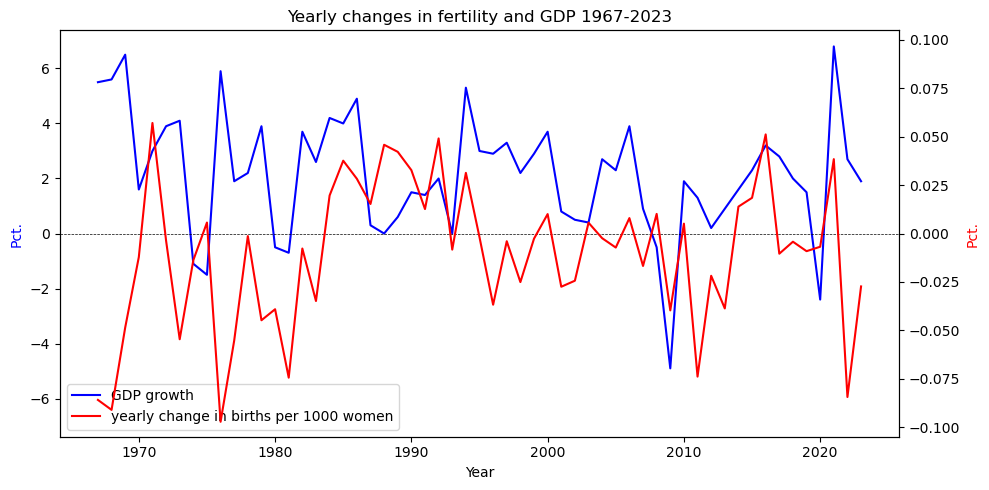

In [55]:
# Plot the data
fig, ax1 = plt.subplots(figsize=(10, 5))

# a. Plot GDP growth on the primary y-axis
ax1.plot(inner.index, inner['g'], color='b', label='GDP growth')
ax1.set_xlabel('Year')
ax1.set_ylabel('Pct.', color='b')

# b. Create a secondary y-axis and plot fertility
ax2 = ax1.twinx()  
ax2.plot(inner.index, inner['rate'], color='r', label='yearly change in births per 1000 women')
ax2.set_ylabel('Pct.', color='r')

# c. Add legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc = 'lower left')

# d. Add title
plt.title('Yearly changes in fertility and GDP 1967-2023')

# e. Align y-axes
mpl_axes_aligner.align.yaxes(ax1, 0, ax2, 0, 0.5)

# f. Add line through 0
ax1.axhline(0, linewidth=0.5, color='black', linestyle='--')

fig.tight_layout()

# Show plot
plt.show()

# Read and clean data

Import your data, either through an API or manually, and load it. 

## Explore each data set

In order to be able to **explore the raw data**, you may provide **static** and **interactive plots** to show important developments 

**Interactive plot** :

In [11]:
def plot_func():
    # Function that operates on data set
    pass

widgets.interact(plot_func, 
    # Let the widget interact with data through plot_func()    
); 


interactive(children=(Output(),), _dom_classes=('widget-interact',))

Explain what you see when moving elements of the interactive plot around. 

# Merge data sets

Now you create combinations of your loaded data sets. Remember the illustration of a (inner) **merge**:

In [12]:
plt.figure(figsize=(15,7))
v = venn2(subsets = (4, 4, 10), set_labels = ('Data X', 'Data Y'))
v.get_label_by_id('100').set_text('dropped')
v.get_label_by_id('010').set_text('dropped' )
v.get_label_by_id('110').set_text('included')
plt.show()

NameError: name 'venn2' is not defined

<Figure size 1500x700 with 0 Axes>

Here we are dropping elements from both data set X and data set Y. A left join would keep all observations in data X intact and subset only from Y. 

Make sure that your resulting data sets have the correct number of rows and columns. That is, be clear about which observations are thrown away. 

**Note:** Don't make Venn diagrams in your own data project. It is just for exposition. 

# Analysis

To get a quick overview of the data, we show some **summary statistics** on a meaningful aggregation. 

MAKE FURTHER ANALYSIS. EXPLAIN THE CODE BRIEFLY AND SUMMARIZE THE RESULTS.

# Conclusion

ADD CONCISE CONLUSION.